In [1]:
#!pip install xgboost

In [2]:
import pandas as pd
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC


In [3]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("Botnet dataset.csv")

# Iterate through the column names and apply the condition
df.columns = [col.strip().replace(" ", "_").replace("\n", "_").lower() for col in df.columns]

# Check the updated column names
print(df.columns)


Index(['internet', 'access_coarse_location', 'access_fine_location',
       'get_tasks', 'change_wifi_state', 'write_external_storage',
       'read_phone_state', 'system_alert_window', 'c2d_message', 'camera',
       ...
       'send_respond_via_message', 'receive_sendto', 'write_secure',
       'add_system_service.1', 'process_incoming_calls', 'user_present',
       'permission_name', 'export', 'read_logs', 'label'],
      dtype='object', length=454)


In [4]:
df.head()

,internet,access_coarse_location,access_fine_location,get_tasks,change_wifi_state,write_external_storage,read_phone_state,system_alert_window,c2d_message,camera,call_phone,bluetooth,bluetooth_admin,authenticate_accounts,manage_accounts,use_credentials,use_sip,write_contacts,read_contacts,read_profile,write_profile,read_social_stream,write_social_stream,write_sms,read_sms,receive_sms,send_sms,receive_mms,receive_wap_push,record_audio,read_user_dictionary,read_cell_broadcasts,read_calendar,write_calendar,read_history_bookmarks,write_history_bookmarks,read_call_log,write_call_log,process_outgoing_calls,nfc,change_wimax_state,change_wifi_multicasts_state,change_component_enabled_state,disable_keyguard,battery_stats,status_bar,status_bar_service,clear_app_cache,access_mock_location,add_voicemail,write_media_storage,write_apn_settings,read_privileged_phone_state,call_privileged,read_frame_buffer,set_preferred_applications,subscribed_feeds_write,inject_events,mount_unmount_file_systems,package_usage_stats,force_stop_packages,install_packages,delete_packages,broadcast_package_removed,access_surface_flinger,access_cache_filesystem,delete_cache_files,backup,set_time,set_orientation,interact_across_users_full,internal_system_window,bind_input_method,bind_widget,bind_appwidget,bind_wallpaper,bind_accessibility_service,bind_directory_search,clear_app_user_data,read_network_usage_history,update_device_stats,manage_users,manage_usb,account_manager,device_power,modify_phone_state,connectivity_internal,master_clear,reboot,mount_format_filesystems,stop_app_switches,hardware_test,factory_test,global_search_control,send_sms_no_confirmation,configure_wifi_display,allow_any_codec_for_playback,broadcast_sms,broadcast_wap_push,broadcast_package_added,broadcast_package_changed,broadcast_package_install,broadcast_package_replaced,control_location_updates,access_network_state,access_wifi_state,change_network_state,modify_audio_settings,foreground_service,get_accounts,read_external_storage,receive_boot_completed,vibrate,wake_lock,billing,receive,bind_get_install_referrer_service,read_settings,write_settings,read_g_services,actiity_recognition,use_fingerprint,use_biometric,set_alarm,read_sync_settings,write_sync_settings,read_sync_stats,system_overlay_window,check_license,broadcast_sticky,expand_status_bar,flashlight,get_package_size,kill_background_processes,recorder_tasks,install_shortcut,uninstall_shortcut,request_ignore_battery_optimizations,set_wallpaper,set_wallpaper_hints,request_delete_packages,request_install_packages,restart_packages,download_without_notification,maps_receive,receive_user_present,receive_adm_message,read_internal_storage,write_internal_storage,write_user_dictionary,update_shortcut,update_count,read_app_badge,change_badge,update_badge,read,write,broadcast_badge,provider_insert_badge,badge_count_read,badge_count_write,update_app_badge,yahoo_inter_app,access,access_gps,access_assisted_gps,access_location,access_permission,access_pushagent,access_coarse_updates,access_provider,access_content_provider,access_location_extra_commands,access_superuser,access_notification_policy,access_all_downloads,access_bluetooth_share,access_download_manager,access_download_manager_advanced,access_fingerprint_manager,access_data,access_user_data,access_shared_data,access_launcher_data,access_photo_lab,access_checkin,access_motorola_privacy_secondary,access_thrid_party_app_authorization,access_course_location,access_background_location,access_background_service,access_backscreen,access_find_location,access_lucy,access_sdk,access_socialnetwork_service,access_weatherclock_provider,permission,permission_sugarsync_service,observe_grant_revoke_permissions,grant_runtime_permissions,cloud_permission,service_permission,permission_manage_overlay,permission_stop_watchdog_after_screen_off,action_manage_overlay_permission,clipboardaveservice_permission,permission_safe_broadcast,permission_separated_process,read_permission,write_permission,ids_permission,cache_per

In [5]:
df.tail()

,internet,access_coarse_location,access_fine_location,get_tasks,change_wifi_state,write_external_storage,read_phone_state,system_alert_window,c2d_message,camera,call_phone,bluetooth,bluetooth_admin,authenticate_accounts,manage_accounts,use_credentials,use_sip,write_contacts,read_contacts,read_profile,write_profile,read_social_stream,write_social_stream,write_sms,read_sms,receive_sms,send_sms,receive_mms,receive_wap_push,record_audio,read_user_dictionary,read_cell_broadcasts,read_calendar,write_calendar,read_history_bookmarks,write_history_bookmarks,read_call_log,write_call_log,process_outgoing_calls,nfc,change_wimax_state,change_wifi_multicasts_state,change_component_enabled_state,disable_keyguard,battery_stats,status_bar,status_bar_service,clear_app_cache,access_mock_location,add_voicemail,write_media_storage,write_apn_settings,read_privileged_phone_state,call_privileged,read_frame_buffer,set_preferred_applications,subscribed_feeds_write,inject_events,mount_unmount_file_systems,package_usage_stats,force_stop_packages,install_packages,delete_packages,broadcast_package_removed,access_surface_flinger,access_cache_filesystem,delete_cache_files,backup,set_time,set_orientation,interact_across_users_full,internal_system_window,bind_input_method,bind_widget,bind_appwidget,bind_wallpaper,bind_accessibility_service,bind_directory_search,clear_app_user_data,read_network_usage_history,update_device_stats,manage_users,manage_usb,account_manager,device_power,modify_phone_state,connectivity_internal,master_clear,reboot,mount_format_filesystems,stop_app_switches,hardware_test,factory_test,global_search_control,send_sms_no_confirmation,configure_wifi_display,allow_any_codec_for_playback,broadcast_sms,broadcast_wap_push,broadcast_package_added,broadcast_package_changed,broadcast_package_install,broadcast_package_replaced,control_location_updates,access_network_state,access_wifi_state,change_network_state,modify_audio_settings,foreground_service,get_accounts,read_external_storage,receive_boot_completed,vibrate,wake_lock,billing,receive,bind_get_install_referrer_service,read_settings,write_settings,read_g_services,actiity_recognition,use_fingerprint,use_biometric,set_alarm,read_sync_settings,write_sync_settings,read_sync_stats,system_overlay_window,check_license,broadcast_sticky,expand_status_bar,flashlight,get_package_size,kill_background_processes,recorder_tasks,install_shortcut,uninstall_shortcut,request_ignore_battery_optimizations,set_wallpaper,set_wallpaper_hints,request_delete_packages,request_install_packages,restart_packages,download_without_notification,maps_receive,receive_user_present,receive_adm_message,read_internal_storage,write_internal_storage,write_user_dictionary,update_shortcut,update_count,read_app_badge,change_badge,update_badge,read,write,broadcast_badge,provider_insert_badge,badge_count_read,badge_count_write,update_app_badge,yahoo_inter_app,access,access_gps,access_assisted_gps,access_location,access_permission,access_pushagent,access_coarse_updates,access_provider,access_content_provider,access_location_extra_commands,access_superuser,access_notification_policy,access_all_downloads,access_bluetooth_share,access_download_manager,access_download_manager_advanced,access_fingerprint_manager,access_data,access_user_data,access_shared_data,access_launcher_data,access_photo_lab,access_checkin,access_motorola_privacy_secondary,access_thrid_party_app_authorization,access_course_location,access_background_location,access_background_service,access_backscreen,access_find_location,access_lucy,access_sdk,access_socialnetwork_service,access_weatherclock_provider,permission,permission_sugarsync_service,observe_grant_revoke_permissions,grant_runtime_permissions,cloud_permission,service_permission,permission_manage_overlay,permission_stop_watchdog_after_screen_off,action_manage_overlay_permission,clipboardaveservice_permission,permission_safe_broadcast,permission_separated_process,read_permission,write_permission,ids_permission,cache_per

In [6]:
df.shape

(2712, 454)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712 entries, 0 to 2711
Columns: 454 entries, internet to label
dtypes: float64(1), int64(453)
memory usage: 9.4 MB


In [8]:
df.describe()

,internet,access_coarse_location,access_fine_location,get_tasks,change_wifi_state,write_external_storage,read_phone_state,system_alert_window,c2d_message,camera,call_phone,bluetooth,bluetooth_admin,authenticate_accounts,manage_accounts,use_credentials,use_sip,write_contacts,read_contacts,read_profile,write_profile,read_social_stream,write_social_stream,write_sms,read_sms,receive_sms,send_sms,receive_mms,receive_wap_push,record_audio,read_user_dictionary,read_cell_broadcasts,read_calendar,write_calendar,read_history_bookmarks,write_history_bookmarks,read_call_log,write_call_log,process_outgoing_calls,nfc,change_wimax_state,change_wifi_multicasts_state,change_component_enabled_state,disable_keyguard,battery_stats,status_bar,status_bar_service,clear_app_cache,access_mock_location,add_voicemail,write_media_storage,write_apn_settings,read_privileged_phone_state,call_privileged,read_frame_buffer,set_preferred_applications,subscribed_feeds_write,inject_events,mount_unmount_file_systems,package_usage_stats,force_stop_packages,install_packages,delete_packages,broadcast_package_removed,access_surface_flinger,access_cache_filesystem,delete_cache_files,backup,set_time,set_orientation,interact_across_users_full,internal_system_window,bind_input_method,bind_widget,bind_appwidget,bind_wallpaper,bind_accessibility_service,bind_directory_search,clear_app_user_data,read_network_usage_history,update_device_stats,manage_users,manage_usb,account_manager,device_power,modify_phone_state,connectivity_internal,master_clear,reboot,mount_format_filesystems,stop_app_switches,hardware_test,factory_test,global_search_control,send_sms_no_confirmation,configure_wifi_display,allow_any_codec_for_playback,broadcast_sms,broadcast_wap_push,broadcast_package_added,broadcast_package_changed,broadcast_package_install,broadcast_package_replaced,control_location_updates,access_network_state,access_wifi_state,change_network_state,modify_audio_settings,foreground_service,get_accounts,read_external_storage,receive_boot_completed,vibrate,wake_lock,billing,receive,bind_get_install_referrer_service,read_settings,write_settings,read_g_services,actiity_recognition,use_fingerprint,use_biometric,set_alarm,read_sync_settings,write_sync_settings,read_sync_stats,system_overlay_window,check_license,broadcast_sticky,expand_status_bar,flashlight,get_package_size,kill_background_processes,recorder_tasks,install_shortcut,uninstall_shortcut,request_ignore_battery_optimizations,set_wallpaper,set_wallpaper_hints,request_delete_packages,request_install_packages,restart_packages,download_without_notification,maps_receive,receive_user_present,receive_adm_message,read_internal_storage,write_internal_storage,write_user_dictionary,update_shortcut,update_count,read_app_badge,change_badge,update_badge,read,write,broadcast_badge,provider_insert_badge,badge_count_read,badge_count_write,update_app_badge,yahoo_inter_app,access,access_gps,access_assisted_gps,access_location,access_permission,access_pushagent,access_coarse_updates,access_provider,access_content_provider,access_location_extra_commands,access_superuser,access_notification_policy,access_all_downloads,access_bluetooth_share,access_download_manager,access_download_manager_advanced,access_fingerprint_manager,access_data,access_user_data,access_shared_data,access_launcher_data,access_photo_lab,access_checkin,access_motorola_privacy_secondary,access_thrid_party_app_authorization,access_course_location,access_background_location,access_background_service,access_backscreen,access_find_location,access_lucy,access_sdk,access_socialnetwork_service,access_weatherclock_provider,permission,permission_sugarsync_service,observe_grant_revoke_permissions,grant_runtime_permissions,cloud_permission,service_permission,permission_manage_overlay,permission_stop_watchdog_after_screen_off,action_manage_overlay_permission,clipboardaveservice_permission,permission_safe_broadcast,permission_separated_process,read_permission,write_permission,ids_permission,cache_per

In [9]:
df.label.value_counts()

label
0    1483
1    1229
Name: count, dtype: int64

In [10]:
#!pip install skimpy

In [11]:
import skimpy

# Select the first 20 columns (or fewer if the dataset has less than 20 columns)
df_first_20_columns = df.iloc[:, :30]

# Generate a skim summary of the first 20 columns
skimpy.skim(df_first_20_columns)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2712   │ │ int32       │ 30    │                                                          │
│ │ Number of columns │ 30     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %  ┃ mean        ┃ sd        ┃ p0  ┃ p25  ┃ p50  ┃ p75 ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ internet                 │   0 │     0 │      0.9668 │    0.1792 │   0 │    1 │    1 │   1 │    1 │      ▇ │  │
│ │ access_coarse_location   │   0 │     0 │      0.2382 │    0.4261 │   0 │    0 │    0 │   0 │    1 │ ▇    ▃ │  │
│ │ access_fine_location     │   0 │     0 │      0.2673 │    0.4426 │   0 │    0 │    0 │   1 │    1 │ ▇    ▃ │  │
│ │ get_tasks                │   0 │     0 │      0.1781 │    0.3827 │   0 │    0 │    0 │   0 │    1 │ ▇    ▂ │  │
│ │ change_wifi_state        │   0 │     0 │      0.1493 │    0.3565 │   0 │    0 │    0 │   0 │    1 │ ▇    ▁ │  │
│ │ write_external_storage   │   0 │     0 │      0.6368 │     0.481 │   0 │    0 │    1 │   1 │    1 │ ▅    ▇ │  │
│ │ read_phone_state         │   0 │     0 │      0.5579 │    0.4967 │   0 │    0 │    1 │   1 │    1 │ ▆    ▇ │  │
│ │ system_alert_window      │   0 │     0 │      0.1574 │    0.3643 │   0 │    0 │    0 │   0 │    1 │ ▇    ▁ │  │
│ │ c2d_message              │   0 │     0 │      0.2205 │    0.4147 │   0 │    0 │    0 │   0 │    1 │ ▇    ▂ │  │
│ │ camera                   │   0 │     0 │      0.1515 │    0.3586 │   0 │    0 │    0 │   0 │    1 │ ▇    ▁ │  │
│ │ call_phone               │   0 │     0 │      0.2522 │    0.4344 │   0 │    0 │    0 │   1 │    1 │ ▇    ▃ │  │
│ │ bluetooth                │   0 │     0 │     0.09329 │    0.2909 │   0 │    0 │    0 │   0 │    1 │ ▇    ▁ │  │
│ │ bluetooth_admin          │   0 │     0 │     0.05605 │    0.2301 │   0 │    0 │    0 │   0 │    1 │   ▇    │  │
│ │ authenticate_accounts    │   0 │     0 │     0.03945 │    0.1947 │   0 │    0 │    0 │   0 │    1 │   ▇    │  │
│ │ manage_accounts          │   0 │     0 │     0.04609 │    0.2097 │   0 │    0 │    0 │   0 │    1 │   ▇    │  │
│ │ use_credentials          │   0 │     0 │     0.05605 │    0.2301 │   0 │    0 │    0 │   0 │    1 │   ▇    │  │
│ │ use_sip                  │   0 │     0 │           0 │         0 │   0 │    0 │    0 │   0 │    0 │     ▇  │  │
│ │ write_contacts           │   0 │     0 │      0.2205 │    0.4147 │   0 │    0 │    0 │   0 │    1 │ ▇    ▂ │  │
│ │ read_contacts            │   0 │     0 │      0.3684 │    0.4824 │   0 │    0 │    0 │   1 │    1 │ ▇    ▅ │  │
│ │ read_profile             │   0 │     0 │     0.01807 │    0.1332 │   0 │    0 │    0 │   0 │    1 │   ▇    │  │
│ │ write_profile            │   0 │     0 │           0 │         0 │   0 │    0 │    0 │   0 │    0 │     ▇  │  │
│ │ read_social_stream       │   0 │     0 │   0.0007375 │   0.02715 │   0 │    0 │    0 │   0 │    1 │   ▇    │  │
│ │ write_social_stream      │   0 │     0 │   0.0003687

In [12]:
for i in df.columns:
    if df[i].dtype == "float64":
        print(f"{i} is of dtype float64")

broadcast_package_changed is of dtype float64


In [13]:
df.isna().sum().sum()

1

In [14]:
# Check for columns with missing values
null_columns = df.columns[df.isnull().any()]

# Print the columns with missing values
if null_columns.any():
    print("Columns with missing values:")
    for col in null_columns:
        print(f"{col}")
else:
    print("No columns with missing values.")


Columns with missing values:
broadcast_package_changed


In [15]:
df.internet.value_counts()

internet
1    2622
0      90
Name: count, dtype: int64

In [16]:
df["broadcast_package_changed"].fillna(method="ffill",inplace = True)

C:\Users\0945\AppData\Local\Temp\ipykernel_2732\3576908456.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["broadcast_package_changed"].fillna(method="ffill",inplace = True)


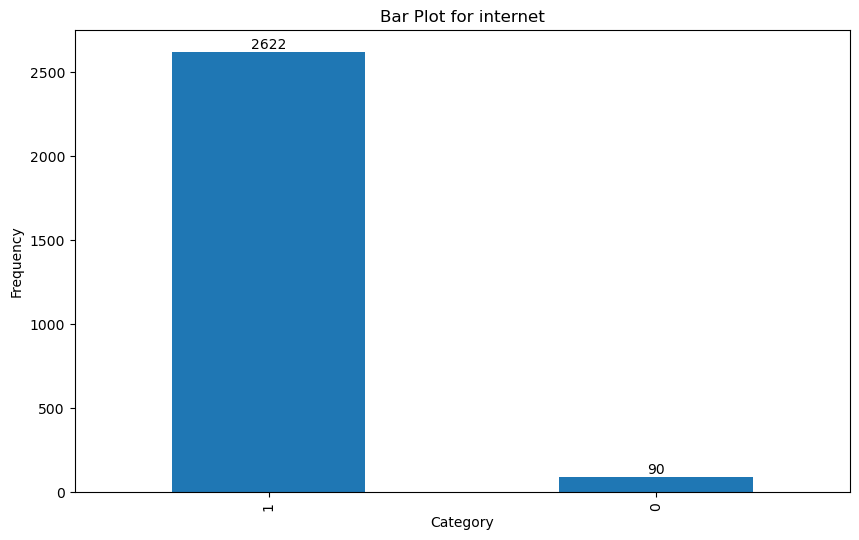

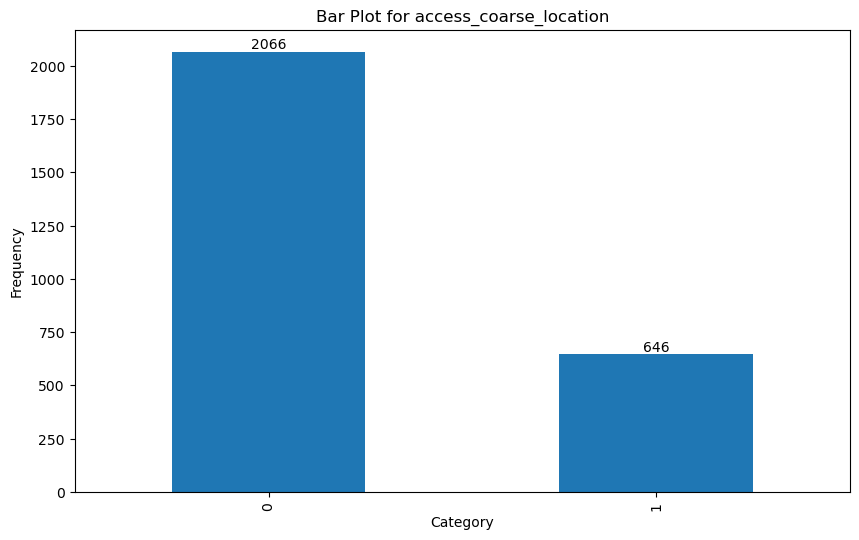

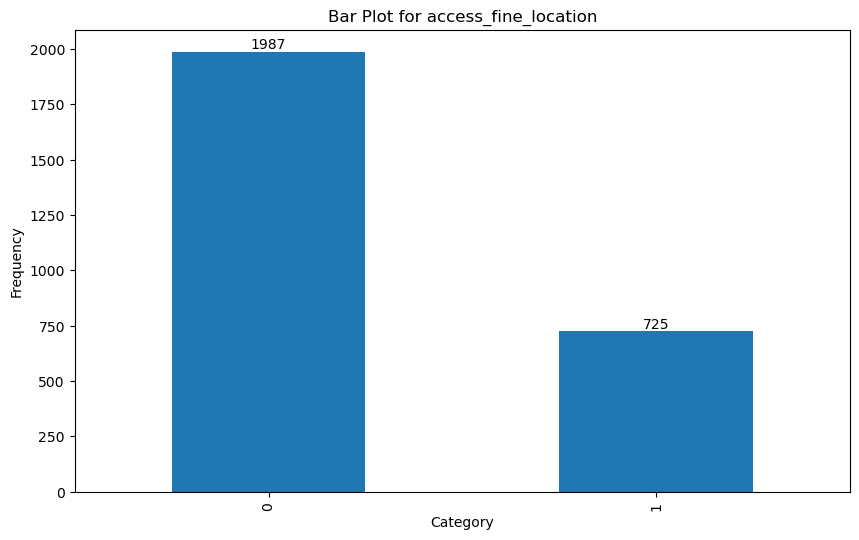

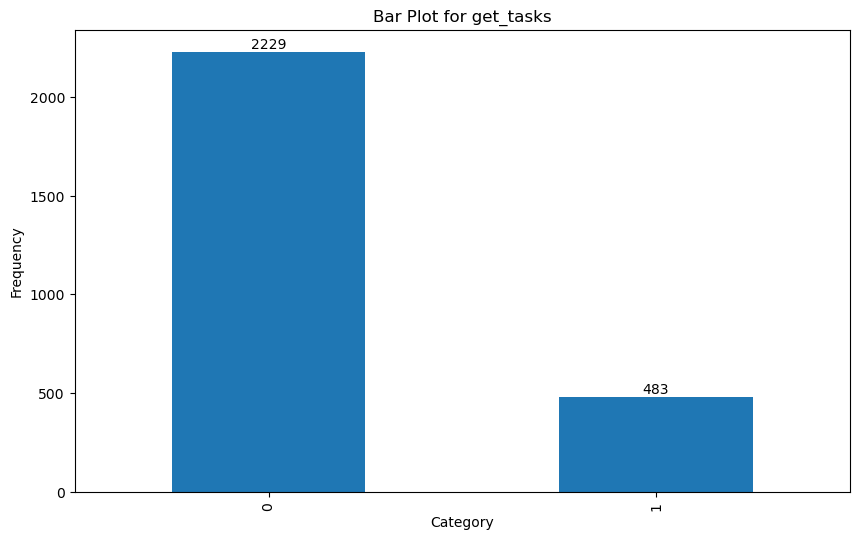

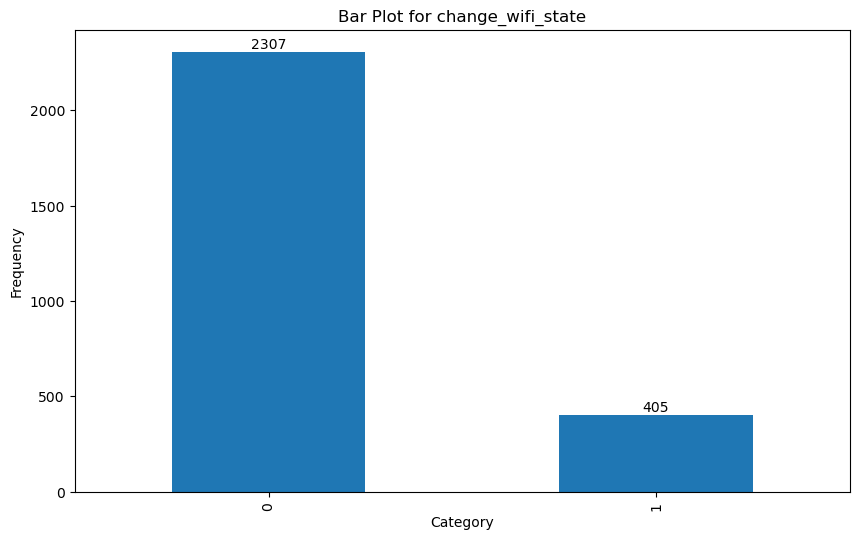

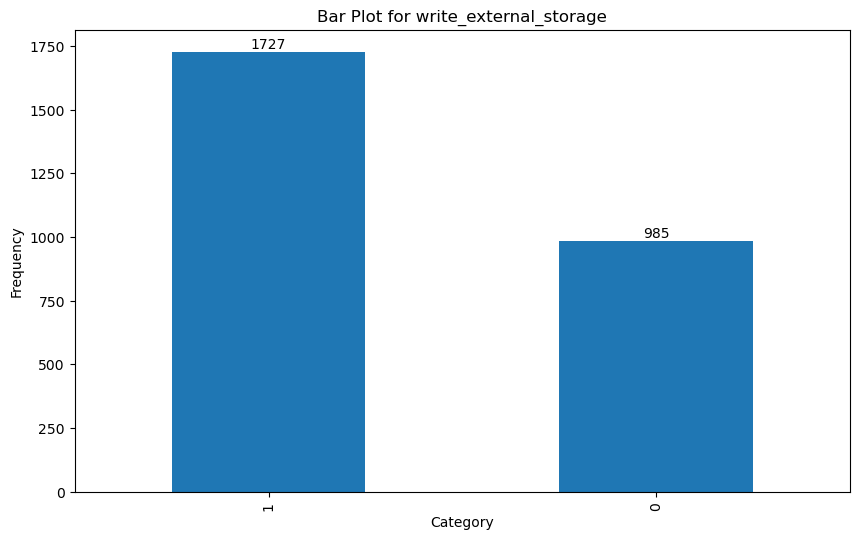

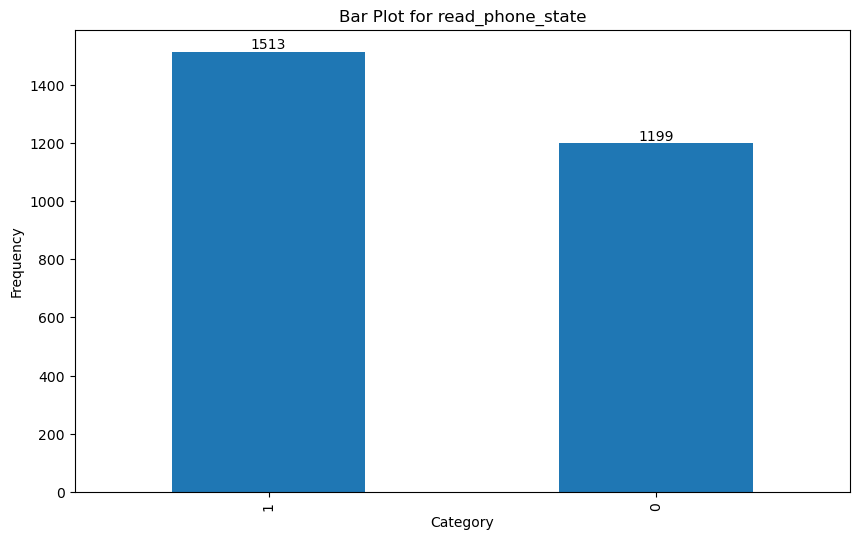

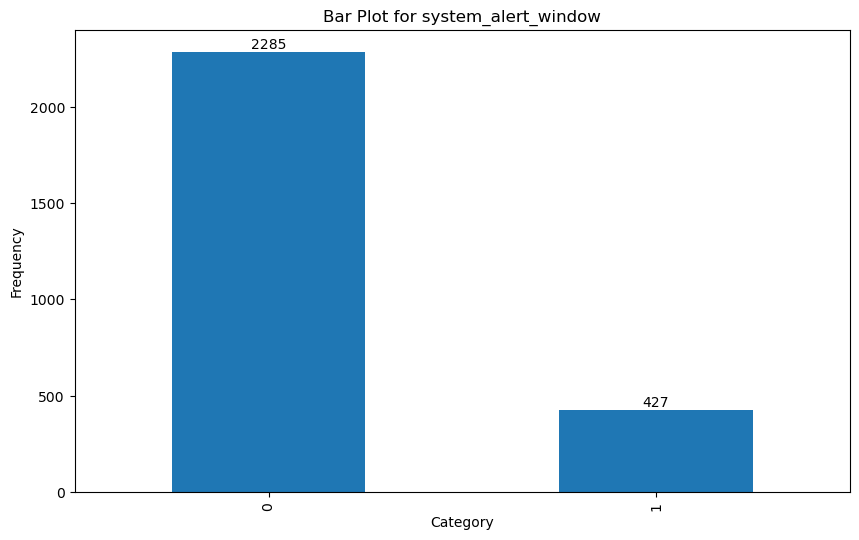

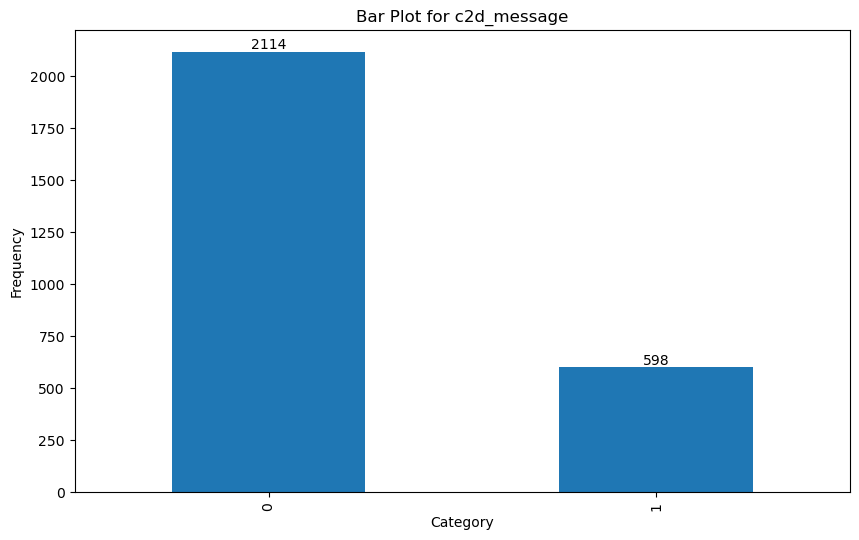

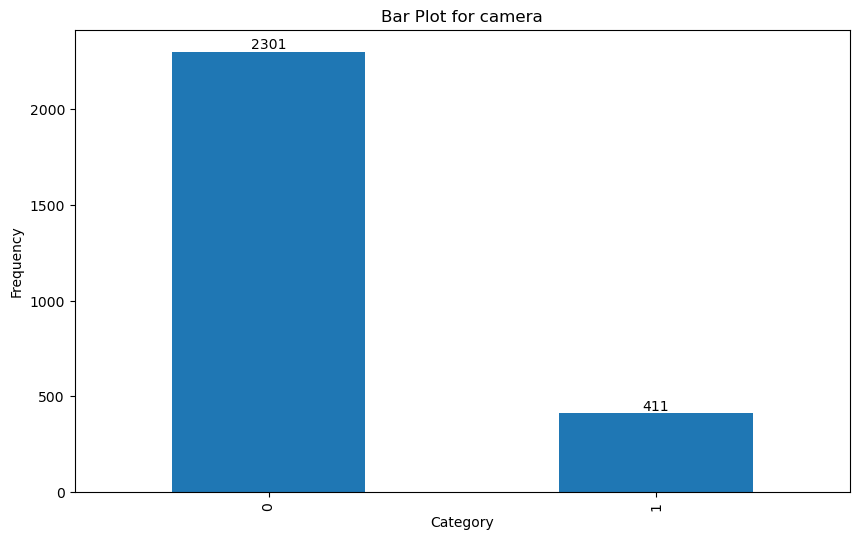

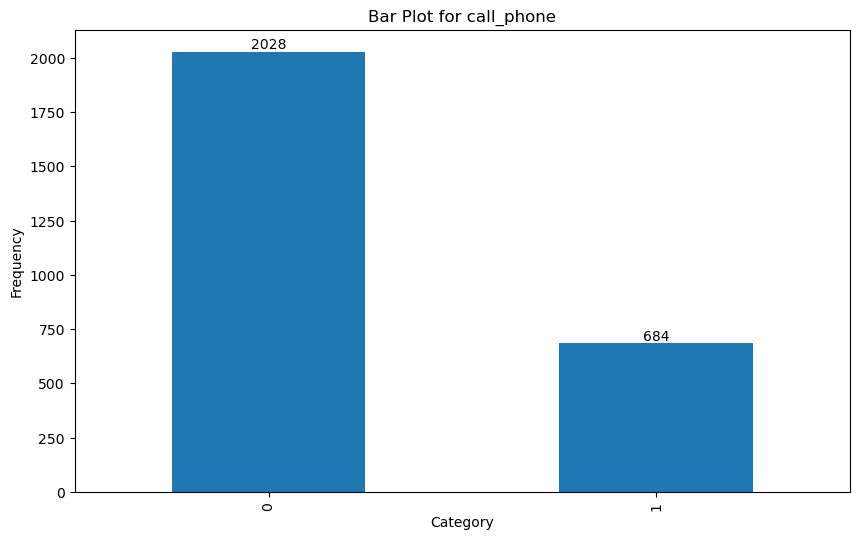

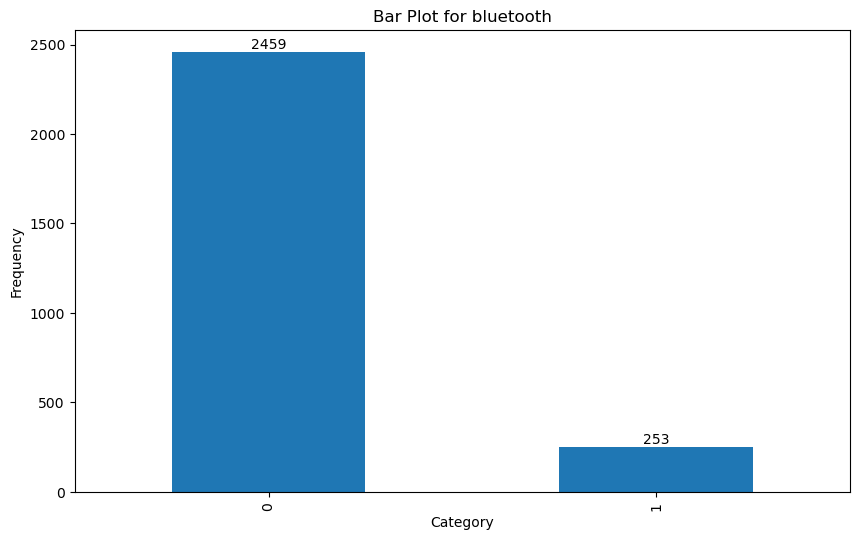

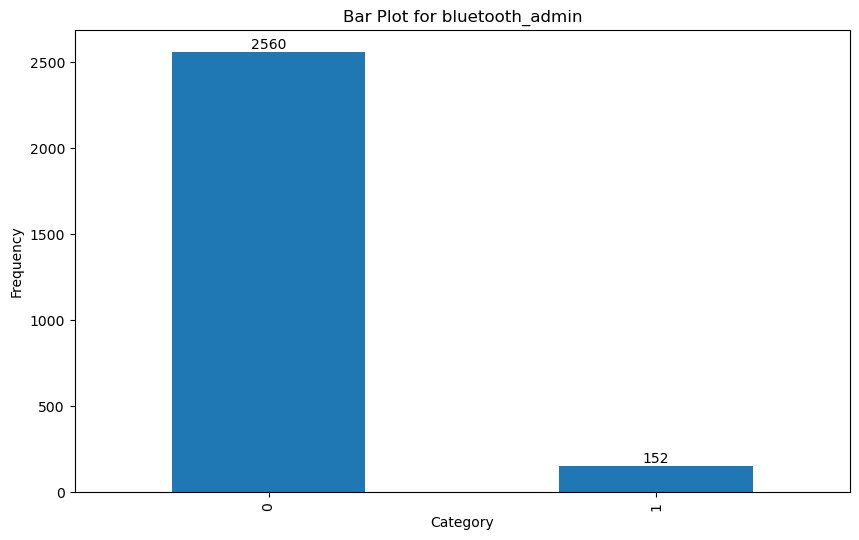

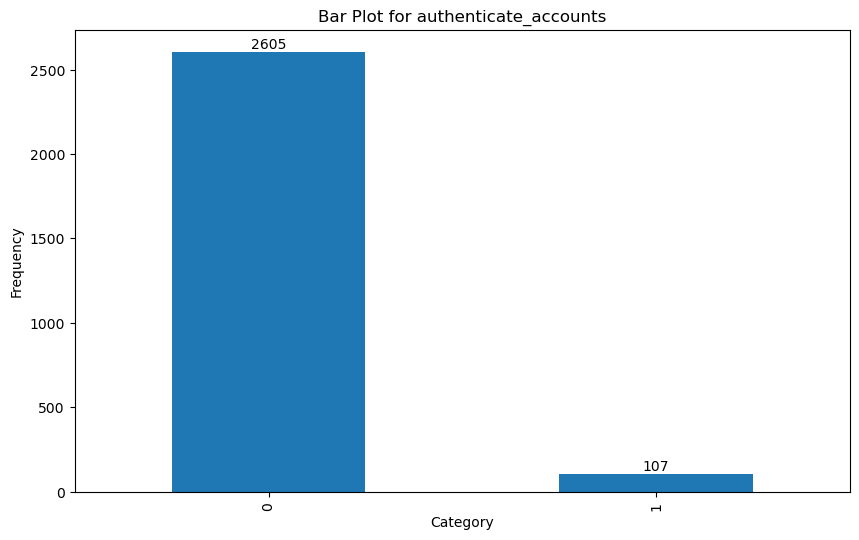

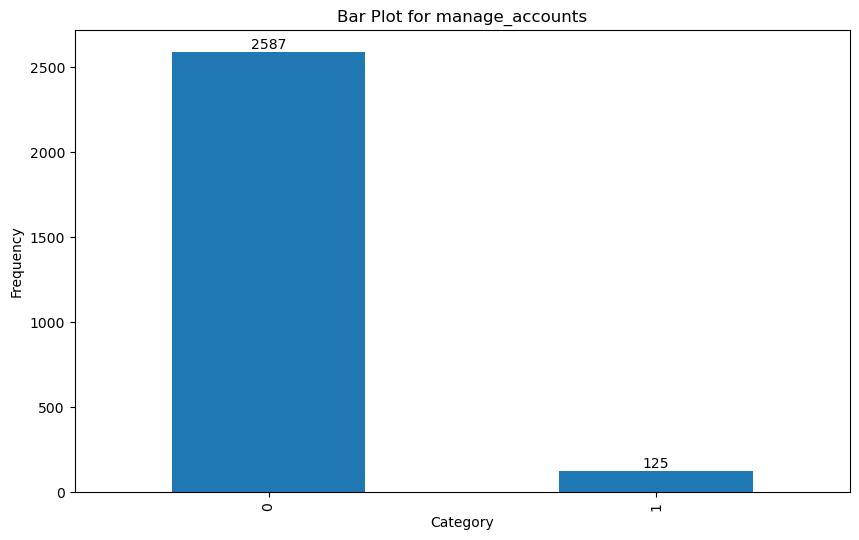

In [17]:
# Iterate through the first 15 columns and create individual bar plots
for col in df.columns[:15]:
    # Plot the bar plot for each column (only if the column is numeric)
    if df[col].dtype in ['float64', 'int64']:
        plt.figure(figsize=(10, 6))
        # Get the value counts of the column and plot the bar plot
        value_counts = df[col].value_counts()
        value_counts.plot(kind='bar')
        
        # Add value counts on top of each bar
        for i, value in enumerate(value_counts):
            plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

        # Add title and labels
        plt.title(f"Bar Plot for {col}")
        plt.xlabel("Category")
        plt.ylabel("Frequency")
        
        # Show the plot
        plt.show()


### Spliting the dataset

In [18]:
X = df.drop('label', axis=1)
y = df['label']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
selector = SelectKBest(score_func=chi2, k=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the feature scores
feature_scores = selector.scores_

# Create a DataFrame to pair the feature names with their scores
feature_names = X_train.columns
features_with_scores = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})

# Sort the features by score in descending order
features_with_scores_sorted = features_with_scores.sort_values(by='Score', ascending=False)

# Print the top 10 features
top_10_features = features_with_scores_sorted.head(10)

print("Top 10 Important Features:")
print(top_10_features)

# Extract the top 10 features as a list
top_10_feature_list = top_10_features['Feature'].tolist()



Top 10 Important Features:
                               Feature       Score
26                            send_sms  793.685350
24                            read_sms  764.060888
115                            receive  610.679225
25                         receive_sms  594.222429
23                           write_sms  582.850731
18                       read_contacts  480.779826
6                     read_phone_state  454.659611
10                          call_phone  428.823120
116  bind_get_install_referrer_service  425.193086
17                      write_contacts  397.293919


In [21]:
# Print the list of top 10 feature names
print("List of Top 10 Features:")
print(top_10_feature_list)

List of Top 10 Features:
['send_sms', 'read_sms', 'receive', 'receive_sms', 'write_sms', 'read_contacts', 'read_phone_state', 'call_phone', 'bind_get_install_referrer_service', 'write_contacts']


In [22]:
x_train = X_train[['send_sms', 'read_sms', 'receive', 
                   'receive_sms', 'write_sms', 'read_contacts', 'read_phone_state', 'call_phone', 
                   'bind_get_install_referrer_service', 'write_contacts']]

x_test = X_test[['send_sms', 'read_sms', 'receive', 
                   'receive_sms', 'write_sms', 'read_contacts', 'read_phone_state', 'call_phone', 
                   'bind_get_install_referrer_service', 'write_contacts']]

In [23]:
# Assuming df is your DataFrame
columns = ['send_sms', 'read_sms', 'receive', 'receive_sms', 'write_sms', 
           'read_contacts', 'read_phone_state', 'call_phone', 
           'bind_get_install_referrer_service', 'write_contacts']

# Iterate over each column and print the value counts
for column in columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print('-' * 50)


Value counts for send_sms:
send_sms
0    1854
1     858
Name: count, dtype: int64
--------------------------------------------------
Value counts for read_sms:
read_sms
0    1854
1     858
Name: count, dtype: int64
--------------------------------------------------
Value counts for receive:
receive
0    1734
1     978
Name: count, dtype: int64
--------------------------------------------------
Value counts for receive_sms:
receive_sms
0    2029
1     683
Name: count, dtype: int64
--------------------------------------------------
Value counts for write_sms:
write_sms
0    2085
1     627
Name: count, dtype: int64
--------------------------------------------------
Value counts for read_contacts:
read_contacts
0    1713
1     999
Name: count, dtype: int64
--------------------------------------------------
Value counts for read_phone_state:
read_phone_state
1    1513
0    1199
Name: count, dtype: int64
--------------------------------------------------
Value counts for call_phone:
call_pho

## Model Traning

In [24]:
## 1. Random Forest 2. XGBoost 3. SVM 4. Decision Tree

## Random Forest

In [25]:
x_train

,send_sms,read_sms,receive,receive_sms,write_sms,read_contacts,read_phone_state,call_phone,bind_get_install_referrer_service,write_contacts
445,0,0,1,0,0,0,0,0,1,0
1093,0,0,1,0,0,0,0,0,1,0
764,0,0,1,0,0,0,1,0,0,0
755,0,0,0,0,0,0,0,0,0,0
964,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1638,1,1,0,1,1,1,1,1,0,1
1095,0,0,0,0,0,0,0,0,0,0
1130,0,0,0,0,0,0,0,0,0,0
1294,0,0,0,0,0,0,0,0,0,0


In [26]:
y_train

445     0
1093    0
764     0
755     0
964     0
       ..
1638    1
1095    0
1130    0
1294    0
860     0
Name: label, Length: 2169, dtype: int64

In [27]:
rf = RandomForestClassifier()

rf.fit(x_train,y_train)

RandomForestClassifier()

In [28]:
y_train_pred = rf.predict(x_train)

In [29]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1186
           1       0.92      0.98      0.95       983

    accuracy                           0.95      2169
   macro avg       0.95      0.96      0.95      2169
weighted avg       0.96      0.95      0.95      2169



In [30]:
y_pred = rf.predict(x_test)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       297
           1       0.93      0.97      0.95       246

    accuracy                           0.96       543
   macro avg       0.95      0.96      0.96       543
weighted avg       0.96      0.96      0.96       543



## XGBoost

In [32]:
model = xgb.XGBClassifier()

model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [33]:
y_train_pred = model.predict(x_train)

In [34]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1186
           1       0.92      0.98      0.95       983

    accuracy                           0.95      2169
   macro avg       0.95      0.96      0.95      2169
weighted avg       0.96      0.95      0.95      2169



In [35]:
y_test_pred =  model.predict(x_test)

In [36]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       297
           1       0.93      0.97      0.95       246

    accuracy                           0.96       543
   macro avg       0.95      0.96      0.96       543
weighted avg       0.96      0.96      0.96       543



## SVM

In [37]:
model1 = SVC()
model1.fit(x_train,y_train)

SVC()

In [38]:
y_train_pred = model1.predict(x_train)

In [39]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1186
           1       0.92      0.98      0.95       983

    accuracy                           0.95      2169
   macro avg       0.95      0.95      0.95      2169
weighted avg       0.95      0.95      0.95      2169



In [40]:
y_test_pred = model1.predict(x_test)

In [41]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       297
           1       0.93      0.98      0.95       246

    accuracy                           0.96       543
   macro avg       0.96      0.96      0.96       543
weighted avg       0.96      0.96      0.96       543



## Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dt_model = DecisionTreeClassifier()

In [44]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:

y_train_pred = dt_model.predict(x_train)

In [46]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1186
           1       0.92      0.98      0.95       983

    accuracy                           0.95      2169
   macro avg       0.95      0.96      0.95      2169
weighted avg       0.96      0.95      0.95      2169



In [47]:
y_test_pred = dt_model.predict(x_test)

In [48]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       297
           1       0.93      0.97      0.95       246

    accuracy                           0.96       543
   macro avg       0.95      0.96      0.96       543
weighted avg       0.96      0.96      0.96       543

